In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm

In [3]:
register_matplotlib_converters()
dog_data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [4]:
pattern = r'(.*\d+(\.\d+)?)/10'

In [5]:
dog_data['ratings'] = dog_data.text.str.extract('(\d+/10)', expand=False)

In [6]:
filtered  = dog_data[dog_data['ratings'].notnull()].copy()

In [7]:
filtered.ratings = filtered['ratings'].str.replace('/10','').astype(float)

In [8]:
filtered = filtered[filtered.ratings < 18]

In [9]:
filtered = filtered.sort_values(by=['created_at'], ascending=False)

In [10]:
filtered['timestamp'] = filtered.created_at.values.astype(pd.Timestamp).astype(np.float64)

In [11]:
filtered.ratings = filtered.ratings.values.astype(np.ndarray).astype(np.float64)

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered.timestamp, filtered.ratings)      

In [13]:
filtered['prediction'] = filtered.timestamp*slope + intercept

In [14]:
filtered

,id,created_at,text,ratings,timestamp,prediction
5836,1125919633284800512,2019-05-08 00:25:33,This is Pake. His parents just graduated and h...,14.0,1.557275e+18,14.275443
5845,1125551585919000577,2019-05-07 00:03:04,This is Dobby. He doesn’t mind bath time becau...,12.0,1.557187e+18,14.272370
5851,1125193941152747520,2019-05-06 00:21:55,This is Remy. She’s a jenga legend. Not sure w...,14.0,1.557102e+18,14.269384
5855,1124776873731342336,2019-05-04 20:44:38,This is Erynn. She had a very busy day at the ...,13.0,1.557003e+18,14.265902
5878,1123738912223051776,2019-05-02 00:00:09,This is Ace. His ear is standing up and it’s n...,13.0,1.556755e+18,14.257237
5894,1123258356611702784,2019-04-30 16:10:36,@NicoleNeyStalks @TheSamiJoShow no still 12/10,12.0,1.556641e+18,14.253225
5896,1123256053267746816,2019-04-30 16:01:26,This is Oatie. He was about to eat the flower ...,12.0,1.556640e+18,14.253206
5905,1122901474583834624,2019-04-29 16:32:28,This is Molly. She was born with rear-end para...,14.0,1.556556e+18,14.250246
5914,1121920964214681600,2019-04-26 23:36:16,RT @Hozier: 13/10 would meet @dog_rates again....,13.0,1.556322e+18,14.242060
5925,1121208017050062848,2019-04-25 00:23:16,This is Louis. He just had a big dinner. Ready...,13.0,1.556152e+18,14.236108


In [15]:
print("Slope is {} and intercept is {}".format(slope, intercept))

Slope is 3.501637950146531e-17 and intercept is -40.25469422540938


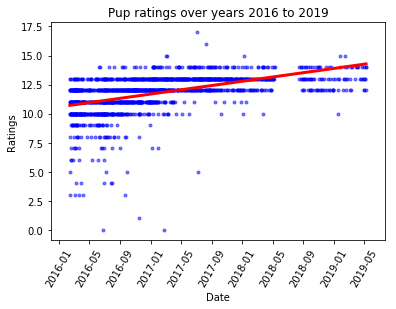

In [16]:
plt.scatter(filtered.created_at, filtered.ratings, marker='.', c='b', alpha=0.5)
plt.title("Pup ratings over years 2016 to 2019")
plt.xlabel("Date")
plt.ylabel("Ratings")
plt.xticks(rotation=60)
plt.plot(filtered.created_at, filtered.prediction, 'r-', linewidth=3)
plt.show()

In [17]:
residuals = filtered.ratings - filtered.prediction

In [18]:
print("Sum of Residuals Squared: {}".format((residuals**2).sum()))
print("The regression has correlation coefficient r={} and proportion of the variance in y\n\
values explained by the regression against x is {}".format(r_value, r_value**2))
print("The standard error is {}".format(std_err))

Sum of Residuals Squared: 3431.279763266894
The regression has correlation coefficient r=0.49661260869600066 and proportion of the variance in y
values explained by the regression against x is 0.24662408311584708
The standard error is 1.4998652604114103e-18


p_value of the regression is: 1.6092573688246278e-104


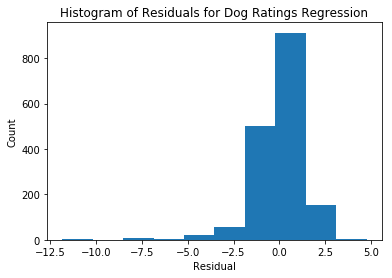

In [19]:
print("p_value of the regression is: {}".format(p_value))
plt.hist(residuals)
plt.title("Histogram of Residuals for Dog Ratings Regression")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()